Book by John V. Guttag

In [6]:
while True:
    val=input("integer")
    try:
        val=int(val)
        print("square:",val**2)
#         break
    except:
        print(val,"is not an integer")
    if val=="q":
        print("quitting")
        break

integer9
square: 81
integer0
square: 0
integer-7
square: 49
integerq
q is not an integer
quitting


In [1]:
import random

In [2]:
random.random()

0.34852196312783623

In [4]:
random.random()

0.1456692551041303

In [6]:
random.seed(100)

In [7]:
random.random()

0.1456692551041303

In [1]:
import pylab,random
def flip_plot(min_exp,max_exp):
    diffs,x_axis=[],[]
    for exp in range(min_exp,max_exp):
        x_axis.append(2**exp)
    for num_flips in x_axis:
        num_heads=0
        for n in range(num_flips):
            if random.choice(("T","H"))=="H":
                num_heads+=1
            num_tails=num_flips-num_heads
        try:
            diffs.append(abs(num_heads-num_tails))
        except ZeroDivisionError:
            continue
#     print(x_axis,diffs)
    pylab.plot(x_axis,diffs,"ko")
    pylab.semilogx()
    pylab.semilogy()
    

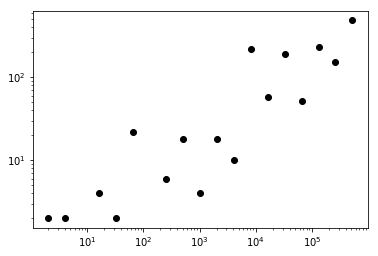

In [2]:
random.seed(0)
flip_plot(1,20)

In [7]:
import random,pylab

In [11]:
def play_series(num_games,team_prob):
    num_won=0
    for game in range(num_games):
        if random.random()<=team_prob:
            num_won+=1
    return (num_won>num_games//2)

def frac_won(team_prob,num_series,series_len):
    won=0
    for series in range(num_series):
        if play_series(series_len,team_prob):
            won+=1
    return won/float(num_series)

def sim_series(num_series):
    prob=0.5
    fracs_won,probs=[],[]
    while prob<=1:
        fracs_won.append(frac_won(prob,num_series,7))
        probs.append(prob)
        prob+=0.01
    pylab.axhline(0.95)
    pylab.plot(probs,fracs_won,'k',linewidth=5)
    print(fracs_won)
    pylab.xlabel("probability of wining a game")
    pylab.ylabel("probability of wining a series")
    pylab.title(str(num_series)+" seven-game series")

[0.49, 0.521, 0.558, 0.572, 0.567, 0.598, 0.621, 0.646, 0.667, 0.702, 0.729, 0.726, 0.773, 0.751, 0.799, 0.794, 0.818, 0.848, 0.856, 0.847, 0.87, 0.878, 0.892, 0.901, 0.911, 0.923, 0.942, 0.932, 0.957, 0.963, 0.97, 0.973, 0.978, 0.98, 0.984, 0.992, 0.992, 0.987, 0.993, 0.998, 0.996, 0.999, 1.0, 0.999, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0]


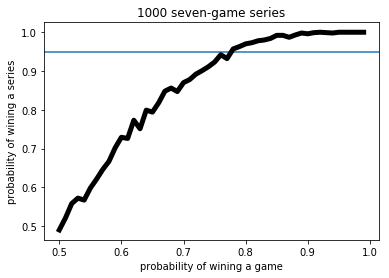

In [12]:
sim_series(1000)

In [13]:
import numpy as np
import pylab,math,random

In [6]:
x=[i for i in np.arange(0.5,1,0.01)]
y=[math.pow(xi,4)*(10*math.pow((1-xi),2)+15*math.pow((1-xi),3)+4*(1-xi)+1) for xi in x]

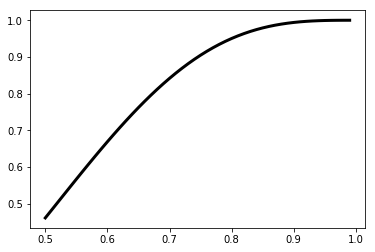

In [7]:
pylab.plot(x,y,"k",linewidth=3)

In [9]:
import numpy as np
np.var([0,1,2,3,4,5])

2.9166666666666665

*****mean 2.4861 *****variance 2.0869
/////mean 2.4992 /////variance 0.0222


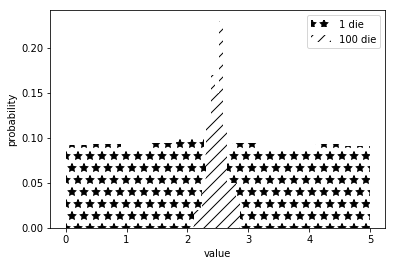

In [18]:
def plot_means(num_dice_per_trial,num_dice_thrown,num_bins,legend,color,style):
    means=[]
    num_trials=num_dice_thrown//num_dice_per_trial
    for i in range(num_trials):
        vals=0
        for j in range(num_dice_per_trial):
            vals+=5*random.random()
        means.append(vals/num_dice_per_trial)
    pylab.hist(means,num_bins,color=color,label=legend,weights=pylab.array(len(means)*[1])/len(means),hatch=style)
    return sum(means)/len(means),np.var(means)

mean,vari=plot_means(1,10000,11,"1 die","w","*")
print("*****mean",round(mean,4),"*****variance",round(vari,4))
mean,vari=plot_means(100,10000,11,"100 die","w","//")
print("/////mean",round(mean,4),"/////variance",round(vari,4))
pylab.xlabel("value")
pylab.ylabel("probability")
pylab.legend()

## T distribution

Text(0, 0.5, 'Probability')

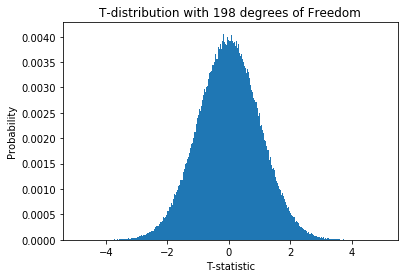

In [28]:
import scipy
degree=198
td=[]
num_bins=1000
for i in range(1000000):
    td.append(scipy.random.standard_t(degree))
pylab.hist(td,bins=num_bins,weights=pylab.array(len(td)*[1.0])/len(td))
pylab.title("T-distribution with {} degrees of Freedom".format(degree))
pylab.xlabel("T-statistic")
pylab.ylabel("Probability")

In [3]:
def calc_bayes(prior_a,prob_b_if_a,prob_b):
    return prior_a*prob_b_if_a/prob_b

p_a=1/3
p6_if_a=1/5
p_6=(1/5+1/6+1/7)/3

post_a=calc_bayes(p_a,p6_if_a,p_6)
print(post_a)

prior_a*** 0.3333333333333333 multiplied by  1.177570093457944
0.39252336448598135


In [4]:
import random
num_rolls=100

for i in range(num_rolls+1):
    if i%(num_rolls//10)==0:
        print("after ",i," rolls. Probability of a=",round(post_a,4))
        post_a=calc_bayes(post_a,p6_if_a,p_6)
#     is6=random.random()>=42/107
#     if is6:
#         post_a=calc_bayes(post_a,p6_if_a,p_6)
#     else:
#         post_a=calc_bayes(post_a,1-p6_if_a,1-p_6)

after  0  rolls. Probability of a= 0.3925
prior_a*** 0.39252336448598135 multiplied by  1.177570093457944
after  10  rolls. Probability of a= 0.4622
prior_a*** 0.4622237750021837 multiplied by  1.177570093457944
after  20  rolls. Probability of a= 0.5443
prior_a*** 0.5443008939278052 multiplied by  1.177570093457944
after  30  rolls. Probability of a= 0.641
prior_a*** 0.6409524545318082 multiplied by  1.177570093457944
after  40  rolls. Probability of a= 0.7548
prior_a*** 0.7547664417851201 multiplied by  1.177570093457944
after  50  rolls. Probability of a= 0.8888
prior_a*** 0.8887903893918239 multiplied by  1.177570093457944
after  60  rolls. Probability of a= 1.0466
prior_a*** 1.0466129819006527 multiplied by  1.177570093457944
after  70  rolls. Probability of a= 1.2325
prior_a*** 1.2324601469110492 multiplied by  1.177570093457944
after  80  rolls. Probability of a= 1.4513
prior_a*** 1.4513082103812358 multiplied by  1.177570093457944
after  90  rolls. Probability of a= 1.709
prior